In [4]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import oneshot as sm
import parallel_euler as arch
import eulerN as arch1
import torch
from torch import nn
# warnings.filterwarnings('ignore'


Uo1 = torch.tensor(np.load('../data/L96-trajectories/train1.npy'))
# Uo2 = np.load('../data/L63-trajectories/train2.npy')
# Uo3 = np.load('../data/L63-trajectories/train3.npy')
# Uo4 = np.load('../data/L63-trajectories/train4.npy')
# Uo5 = np.load('../data/L63-trajectories/train5.npy')
# Uo6 = np.load('../data/L63-trajectories/train6.npy')
# Uo7 = np.load('../data/L63-trajectories/train7.npy')
# Uo8 = np.load('../data/L63-trajectories/train8.npy')
# Uo9 = np.load('../data/L63-trajectories/train9.npy')
# Uo10 = np.load('../data/L63-trajectories/train10.npy')

Vo = torch.tensor(np.load('../data/L96-trajectories/test.npy'))
L0, L1 = 0.4, 3.5
D, D_r, B = 3, 128, 1
beta = 7e-8
m = 500
data_folder = '../data'

In [5]:
drf = arch.DeepRF(512, B, 2, 2, L0, L1, Uo1, beta, name='rf', save_folder=f'{data_folder}/EulerN/depth-{B}')
# drf1 = arch1.DeepRF(512, B, L0, L1, Uo1, beta, name='rf', save_folder=f'{data_folder}/EulerN/depth-{B}')
# u = torch.randn(size=(10000, 40))
# drf.forecast(u).shape

drf.learn(Uo1[:, :10000], 42)
tau = drf.compute_tau_f(Vo[:500]);
tau[1].mean()
# drf.net.Ng, drf.net.G, drf.net.I

Time taken by forward is 0.0122 seconds
Time taken by forward is 0.0119 seconds
Time taken by forward is 0.0121 seconds
Time taken by forward is 0.0115 seconds
Time taken by forward is 0.0117 seconds
Time taken by forward is 0.0122 seconds
Time taken by forward is 0.0123 seconds
Time taken by forward is 0.0121 seconds
Time taken by forward is 0.0125 seconds
Time taken by forward is 0.0126 seconds
Time taken by forward is 0.0140 seconds
Time taken by forward is 0.0133 seconds
Time taken by forward is 0.0122 seconds
Time taken by forward is 0.0125 seconds
Time taken by forward is 0.0126 seconds
Time taken by forward is 0.0124 seconds
Time taken by forward is 0.0120 seconds
Time taken by forward is 0.0127 seconds
Time taken by forward is 0.0128 seconds
Time taken by forward is 0.0125 seconds
Time taken by forward is 0.0118 seconds
Time taken by forward is 0.0122 seconds
Time taken by forward is 0.0125 seconds
Time taken by forward is 0.0122 seconds
Time taken by forward is 0.0118 seconds


tensor(2.6444)

In [3]:
test = Vo[:100]
with torch.no_grad():
            test.to(drf.device)
            tau_f_se, tau_f_rmse = torch.zeros(len(test)).to(drf.device), torch.zeros(len(test)).to(drf.device)
            drf.validation_points = test.shape[-1]
            drf.error_threshold = 0.05
            drf.dt = 0.02
            drf.Lyapunov_time = 1/0.91
            se, rmse = torch.zeros(len(test)).to(drf.device), torch.zeros(len(test)).to(drf.device)
            forecast = drf.multistep_forecast 
          
          
            prediction = forecast(test[:,:,0], drf.validation_points)
            se_ = torch.sum((test - prediction)**2, axis=1) / torch.sum(test**2, axis=1)
            # mse_ = torch.cumsum(se_, dim=1) / torch.arange(1, se_.shape[1]+1).to(drf.device)
    
            
            l = torch.argmax((se_ > drf.error_threshold).to(torch.long), dim=1)
            l[l==0] = drf.validation_points
            l[l>0] -= 1
            tau_f_se = l * (drf.dt / drf.Lyapunov_time)


            # l = torch.argmax((se_ > drf.error_threshold).to(torch.long))
            # if l == 0:
            #     tau_f_se[validation_index] = drf.validation_points
            # else:
            #     tau_f_se[validation_index] = l-1
            
            # rmse[validation_index] = torch.sqrt(mse_[-1])
            # se[validation_index] = se_.mean()
    
                
            
            # tau_f_rmse *= 
            # tau_f_se *= (drf.dt / drf.Lyapunov_time)

(array([ 2.,  9., 16., 27., 26., 12.,  5.,  2.,  0.,  1.]),
 array([ 3.8766 ,  4.78842,  5.70024,  6.61206,  7.52388,  8.4357 ,
         9.34752, 10.25934, 11.17116, 12.08298, 12.9948 ]),
 <BarContainer object of 10 artists>)

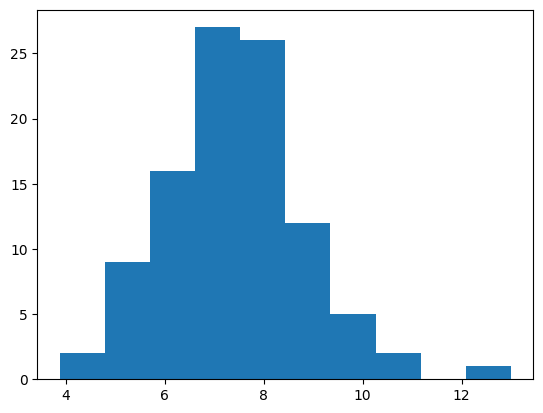

In [33]:
plt.hist(tau_f_se)

In [9]:
tau_f_se.mean()

tensor(0.0570)

In [2]:
description = "This experiment tests the class ExperimentLogger.This class is meant logging experiments easier."
el = ut.ExperimentLogger('../data', description)
el.add(rf1)

In [3]:
a = torch.arange(-2, 3).reshape(-1, 1)
a = 2*((a + 0) % 20)
a = torch.cat([a, a+1], dim=1).flatten()
a = torch.vstack([(a + 2*i) % 40 for i in range(20)])
a

tensor([[36, 37, 38, 39,  0,  1,  2,  3,  4,  5],
        [38, 39,  0,  1,  2,  3,  4,  5,  6,  7],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
        [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
        [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
        [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
        [26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [28, 29, 30, 31, 32, 33, 34, 35, 36, 37],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [32, 33, 34, 35, 36, 37, 38, 39,  0,  1],
        [34, 35, 36, 37, 38, 39,  0,  1,  2,  3]])

In [10]:
a = torch.arange(0, 2)#.reshape(-1, 1)
# a = 2*((a + 0) % 20)
# a = torch.cat([a, a+1], dim=1).flatten()
a = torch.vstack([(a + 2*i) % 40 for i in range(20)])
a

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19],
        [20, 21],
        [22, 23],
        [24, 25],
        [26, 27],
        [28, 29],
        [30, 31],
        [32, 33],
        [34, 35],
        [36, 37],
        [38, 39]])

In [7]:
Uo1.T[..., a].flatten(0, 1).shape

torch.Size([4000000, 10])

In [4]:
Uo1.shape

torch.Size([40, 200000])

In [5]:
L = torch.nn.Linear(2, 3)

In [10]:
x = torch.tensor([[-1, 2.], [2., 3.]])
y = torch.tensor([[-1, 8.], [0., 3.]])
z = torch.stack([x, y], axis=0)
L(x)
L(z) == torch.stack([L(x), L(y)], axis=0)

tensor([[[True, True, True],
         [True, True, True]],

        [[True, True, True],
         [True, True, True]]])

In [9]:
z.shape

torch.Size([2, 2, 2])

(array([ 12.,  30.,  60.,  87., 110.,  79.,  67.,  30.,  19.,   6.]),
 array([1.183  , 1.47238, 1.76176, 2.05114, 2.34052, 2.6299 , 2.91928,
        3.20866, 3.49804, 3.78742, 4.0768 ]),
 <BarContainer object of 10 artists>)

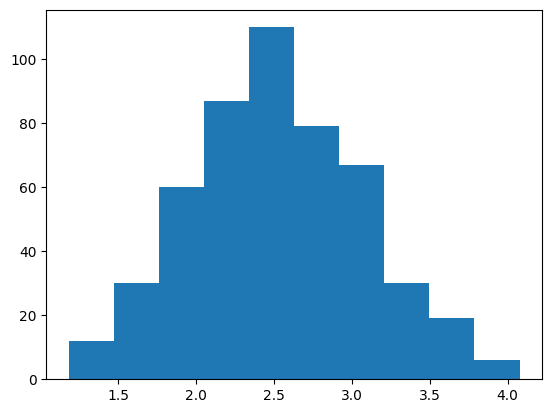

In [6]:
plt.hist(tau[0])